<a href="https://colab.research.google.com/github/himanshutyagi2020/Tensorflow/blob/main/Wine_dataset_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
#List the content (Access the google drive)
!ls "/content/gdrive/MyDrive/Problem"

wine_fraud.csv


#import the libraries and load the dataset

In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/gdrive/MyDrive/Problem/wine_fraud.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [7]:
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  ...  alcohol  quality   type
0               7.4              0.70         0.00  ...      9.4    Legit    red
1               7.8              0.88         0.00  ...      9.8    Legit    red
2               7.8              0.76         0.04  ...      9.8    Legit    red
3              11.2              0.28         0.56  ...      9.8    Legit    red
4               7.4              0.70         0.00  ...      9.4    Legit    red
...             ...               ...          ...  ...      ...      ...    ...
6492            6.2              0.21         0.29  ...     11.2    Legit  white
6493            6.6              0.32         0.36  ...      9.6    Legit  white
6494            6.5              0.24         0.19  ...      9.4    Legit  white
6495            5.5              0.29         0.30  ...     12.8    Legit  white
6496            6.0              0.21         0.38  ...     11.8    Legit  

#unique variables in the target column we are trying to predict (quality)

In [8]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [9]:
df['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 , 2.96, 2.97, 3.64, 2.85, 3.82, 3.81, 3.65, 3.77, 2.91, 2.8 ,
       2.72, 2.79, 3.8 , 2.77, 3.79, 2.84, 3.76, 2.83, 2.82])

# countplot that displays the count per category of Legit vs Fraud (Is the label/target balanced or unbalanced?)

In [10]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or li

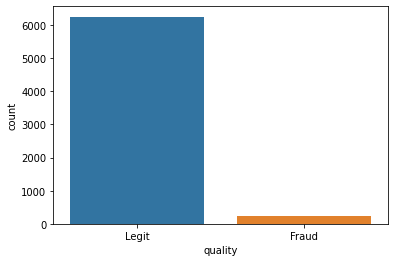

In [11]:
sns.countplot(x='quality',data=df)

##difference between red and white wine when it comes to fraud.Create a countplot that has the wine type on the x axis with the hue separating columns by Fraud vs Legit.

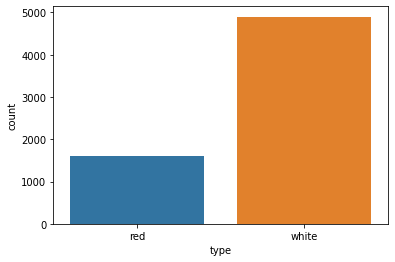

In [27]:
sns.countplot(x='type',data=df)

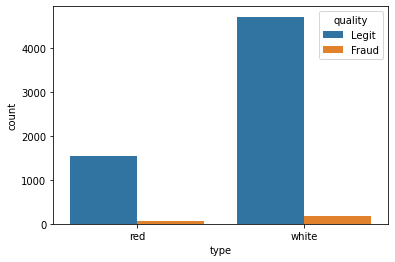

In [13]:
sns.countplot(x='type',data=df,hue='quality')

#Percentage of red wines are Fraud?Percentage of white wines are fraud?

In [28]:
reds = df[df['type']=='red']

In [29]:
whites = df[df['type']=='white']

In [30]:
Frauds= df[df['quality']=='Fraud']

In [31]:
len(reds)

1599

In [32]:
len(whites)

4898

In [33]:
len(Frauds)

246

In [42]:
print("Percentage of red wines are Fraud:")
print(100*len(Frauds)/len(reds))

Percentage of red wines are Fraud:
15.384615384615385


In [35]:
print("Percentage of white wines are Fraud:")
print(100*len(Frauds)/len(whites))

Percentage of white wines are Fraud:
5.022458146182115


##Calculation

In [36]:
print("Percentage of fraud in Red Wines:")
print(100* (len(reds[reds['quality']=='Fraud'])/len(reds)))

Percentage of fraud in Red Wines:
3.9399624765478425


In [37]:
print("Percentage of fraud in White Wines:")
print(100* (len(whites[whites['quality']=='Fraud'])/len(whites)))

Percentage of fraud in White Wines:
3.7362188648427925


#correlation between the various features and the "quality" column

In [38]:
#need to map the column to 0 and 1 instead of a string.
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})

In [39]:
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

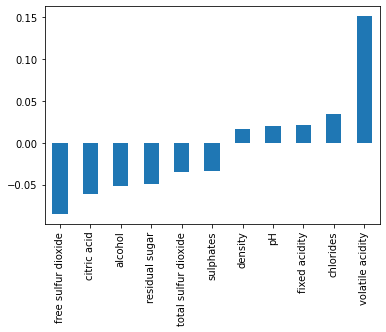

In [40]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')